# Practica uso del API de euroS

In [1]:
#PIP
!pip install eurostat

# Request API
from urllib.request import urlretrieve
from urllib.request import urlopen
from eurostat.eurostat import get_sdmx_dic

# Libraries análisis data 
import pandas as pd # data panel
import numpy as np # linear algebra
import eurostat # api eurostat
import json # documentos no estructuurados
import matplotlib.pyplot as plt # plot graficos 

  Using cached pandaSDMX-0.9-py2.py3-none-any.whl (45 kB)
  Using cached jsonpath_rw-1.4.0-py3-none-any.whl

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [7]:
# Creamos una variable string con la url de la llamada al api de Eurostat para obtener los datos del colectivo objetivo del estudio."
urlEUROSTAT = 'http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/ilc_pw01?precision=1&sex=T&indic_wb=JOBSAT&isced11=ED5-8&age=Y25-34'

# Diccionario con el objeto JSON que se obtiene al realizar la petición a la API de la consulta del punto anterior.
result = json.load(urlopen(urlEUROSTAT))

# Print "dimension" del diccionario creado. Puedes utilizar la función urlopen() de la librería urllib.request.
print(result['dimension'])

{'unit': {'label': 'unit', 'category': {'index': {'RTG': 0}, 'label': {'RTG': 'Rating (0-10)'}}}, 'isced11': {'label': 'isced11', 'category': {'index': {'ED5-8': 0}, 'label': {'ED5-8': 'Tertiary education (levels 5-8)'}}}, 'indic_wb': {'label': 'indic_wb', 'category': {'index': {'JOBSAT': 0}, 'label': {'JOBSAT': 'Job satisfaction'}}}, 'sex': {'label': 'sex', 'category': {'index': {'T': 0}, 'label': {'T': 'Total'}}}, 'age': {'label': 'age', 'category': {'index': {'Y25-34': 0}, 'label': {'Y25-34': 'From 25 to 34 years'}}}, 'geo': {'label': 'geo', 'category': {'index': {'AL': 0, 'AT': 1, 'BE': 2, 'BG': 3, 'CH': 4, 'CY': 5, 'CZ': 6, 'DE': 7, 'DK': 8, 'EA': 9, 'EA18': 10, 'EA19': 11, 'EE': 12, 'EL': 13, 'ES': 14, 'EU': 15, 'EU27_2007': 16, 'EU27_2020': 17, 'EU28': 18, 'FI': 19, 'FR': 20, 'HR': 21, 'HU': 22, 'IE': 23, 'IS': 24, 'IT': 25, 'LT': 26, 'LU': 27, 'LV': 28, 'ME': 29, 'MK': 30, 'MT': 31, 'NL': 32, 'NO': 33, 'PL': 34, 'PT': 35, 'RO': 36, 'RS': 37, 'SE': 38, 'SI': 39, 'SK': 40, 'TR': 

In [10]:
# Descargamos los datos de Satisfacción en Europa (código del dataset: ilc_pw01) en formato pandas a partir de la función get_data_df() de librería eurostat. 
data = eurostat.get_data_df('ilc_pw01', flags=False)

#Reconocimiento de variables 
dims = eurostat.get_sdmx_dims('ilc_pw01')
dic = eurostat.get_sdmx_dic('ilc_pw01', 'GEO')

#Print variables 
print('DIMENSIONES')
print(dims)
print('\n')
print('DICCIONARIO')
print(dic)
print('\n')
print('DATOS')
print(data)


DIMENSIONES
['AGE', 'FREQ', 'GEO', 'INDICATORS', 'INDIC_WB', 'ISCED11', 'OBS_FLAG', 'SEX', 'TIME', 'UNIT']


DICCIONARIO
{'AL': 'Albania', 'AT': 'Austria', 'BE': 'Belgium', 'BG': 'Bulgaria', 'CH': 'Switzerland', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany (until 1990 former territory of the FRG)', 'DK': 'Denmark', 'EA': 'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015)', 'EA18': 'Euro area - 18 countries (2014)', 'EA19': 'Euro area - 19 countries  (from 2015)', 'EE': 'Estonia', 'EL': 'Greece', 'ES': 'Spain', 'EU': 'European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)', 'EU27_2007': 'European Union - 27 countries (2007-2013)', 'EU27_2020': 'European Union - 27 countries (from 2020)', 'EU28': 'European Union - 28 countries (2013-2020)', 'FI': 'Finland', 'FR': 'France', 'HR': 'Croatia', 'HU': 'Hungary', 'IE': 'Ireland', 'IS': 'Iceland', 'IT': 'Italy', 'LT': 'Lithuania', 'LU': 

In [6]:
# Filtramos el conjunto de datos del punto 1 directamente en este Data Frame y presenta las 6 primeras filas

#Filtros
StartPeriod = 2018
EndPeriod = 2018
filter_pars = {'INDIC_WB': ['JOBSAT',], 'SEX': ['T'], 'AGE': ['Y25-34'], 'ISCED11': ['ED5-8']}

#Dataframe .get
df = eurostat.get_sdmx_data_df('ilc_pw01', StartPeriod, EndPeriod, filter_pars, flags = False, verbose=True)

#Filtro & sort
df_filter = df.sort_values(by=2018, ascending=True)
df_filter.head(6)

Progress: 100.0%


,ISCED11,UNIT,SEX,INDIC_WB,AGE,GEO,FREQ,2018
0,ED5-8,RTG,T,JOBSAT,Y25-34,AL,A,6.5
13,ED5-8,RTG,T,JOBSAT,Y25-34,EL,A,6.5
41,ED5-8,RTG,T,JOBSAT,Y25-34,TR,A,6.7
37,ED5-8,RTG,T,JOBSAT,Y25-34,RS,A,7.0
3,ED5-8,RTG,T,JOBSAT,Y25-34,BG,A,7.0
42,ED5-8,RTG,T,JOBSAT,Y25-34,UK,A,7.1


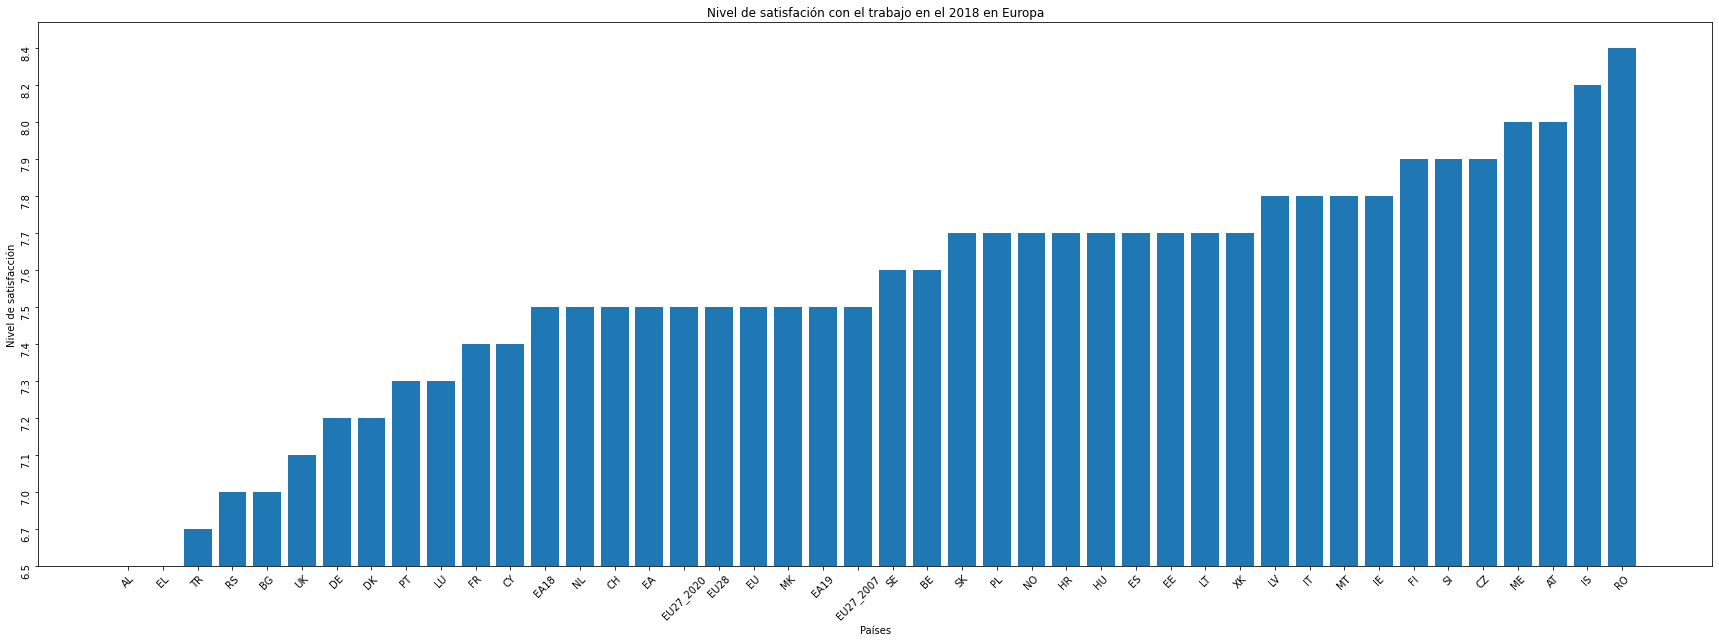

In [12]:
# Construimos un gráfico donde se presente el nivel de satisfacción en cada país del colectivo objetivo del estudio en el año 2018.
# ¿En qué país están más satisfechos con el trabajo en 2018? ¿En qué país están menos satisfechos?

# Configuramos el tamaño de la imagen
fig = plt.figure(figsize = (30, 10))

# filtramos los valores que deseamos plotear
df_sa = df_filter[2018]
langs = df_filter['GEO']

# configuramos el plot
plt.bar(langs, df_sa)
plt.title('Nivel de satisfación con el trabajo en el 2018 en Europa')
plt.xlabel('Países')
plt.ylabel('Nivel de satisfacción')
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()


* El país en el cual estan más satisfechos con el trabajo en el 2018 es **RO: ROMANÍA**

* Los países que estan menos satisfechos son **AL: ALBANIA** y **EL: GRECIA**